#Model Fitting

When fitting a model, you must be able to explain the reason for choosing a certain model and how the model works. 
*KEEP THAT IN MIND*

>  *Which models would i want to study and try?*

> Boosting models > LGBM, GBM, Catboost and etc

> Naive Bayes

> CNN

# Classification Algos
> Logistic Regression

> Tabnet

> Naive Bayes

> CNN

> Ensemble (Tree, GBM)

# Hyper Param Tuning
> Grid Search (optuna,,?)

>K Fold

#Data 불러오기
ALL DONE BEFORE FEATURE ENGINEERING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np

train_data= pd.read_csv('/content/drive/MyDrive/잡케어/train_data_final.csv')
test_data= pd.read_csv('/content/drive/MyDrive/잡케어/test_data_final.csv')

sample_sub= pd.read_csv('/content/drive/MyDrive/잡케어/sample_submission.csv')

In [14]:
train_data

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,0,1,0,0,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,3,13,12,55,52
501947,1,1,0,1,0,0,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,1,20,11,51,51
501948,1,1,1,1,0,0,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,8,5,17,27,24
501949,1,0,0,1,0,0,1,1,2,1,46,147,145,4,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,1,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,6,15,9,23,21


In [15]:
test_data

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,12,1,2,24,18
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,12,17,5,42,53
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,12,10,23,33,41
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,12,3,19,44,55
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,12,11,21,24,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,1,1,1,0,0,0,2,0,4,1,147,46,145,4,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,12,17,1,6,26
46400,1,0,0,1,0,0,2,0,4,1,176,120,159,4,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,12,29,21,57,25
46401,1,1,0,1,1,1,2,0,3,1,145,46,147,5,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,12,10,19,9,9
46402,1,1,0,1,1,1,1,3,3,2,145,46,147,6,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,12,7,14,4,34


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


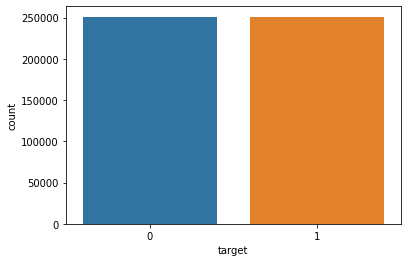

In [26]:
import seaborn as sns
sns.countplot(train_data.target)

# train_test_split

In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix

In [17]:
#splitting the data into train / test using train_test_split
x = train_data.drop('target', axis=1)
y= train_data.target

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

#Logistic Regression

: 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법. 선형회귀분석과 유사하지만, 종속변수가 범주형 데이터(이항)를 대상으로 하며, 결과가 특정한 분류로 나뉘기 때문에 일종의 Classification 기법으로도 볼 수 있다. 

> 0.633 > 0.637

index만 drop 했는데 왜 0.544?

In [18]:
#Logistic Reg
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred= lr_clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
cm = confusion_matrix(y_test, pred)
cm

array([[26966, 23372],
       [22652, 27401]])

In [20]:
#Precision
TN, FP, FN, TP= cm.ravel() #ravel > 평평하게

precision = TP/ (FP+TP)
print('precision : ', precision)

recall = TP/ (FN+TP)
print('recall : ', recall)

F1 = 2* (precision*recall)/(precision+recall)
print('F1 : ', F1)

precision :  0.539676599767593
recall :  0.5474397139032625
F1 :  0.5435304385773511


In [21]:
print(round(f1_score(y_test, pred),3))

0.544


#Feature Selection 

> Chi2

: Chi-Square test is used in statistics to test the independence of to events. Given the data of two variables, we can get observed count (O) and expected count (E). Chi-Square measures how E and O derivates each other.

In feature selection, we aim to select the features which are highly dependent on the response. in simple words, higher the Chi- Square value, the feature is more dependent on the response and it can be selected for model training.

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

>0.51 더 내려감

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, Y_train, X_test):
  fs= SelectKBest(score_func= chi2, k=10)
  fs.fit(X_train,Y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs= fs.transform(X_test)
  return X_train_fs, X_test_fs

In [40]:
X_train_fs, X_test_fs = select_features(x_train,y_train,x_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_fs, y_train)

y_pred= lr_clf.predict(X_test_fs)
print(round(f1_score(y_test, y_pred),3))

0.51


#Catboost

0.639

feature selection/ optimization 진행 해보기

optuna 참고
https://www.dacon.io/codeshare/2750

In [23]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [24]:
from catboost import CatBoostClassifier

cbc= CatBoostClassifier(random_state=0)

cbc.fit(x_train,y_train)

Learning rate set to 0.133271
0:	learn: 0.6875955	total: 202ms	remaining: 3m 22s
1:	learn: 0.6836934	total: 348ms	remaining: 2m 53s
2:	learn: 0.6806295	total: 500ms	remaining: 2m 46s
3:	learn: 0.6779760	total: 657ms	remaining: 2m 43s
4:	learn: 0.6760487	total: 798ms	remaining: 2m 38s
5:	learn: 0.6745792	total: 960ms	remaining: 2m 39s
6:	learn: 0.6730248	total: 1.11s	remaining: 2m 36s
7:	learn: 0.6717857	total: 1.24s	remaining: 2m 33s
8:	learn: 0.6706351	total: 1.39s	remaining: 2m 33s
9:	learn: 0.6698618	total: 1.53s	remaining: 2m 31s
10:	learn: 0.6690248	total: 1.68s	remaining: 2m 30s
11:	learn: 0.6684360	total: 1.81s	remaining: 2m 29s
12:	learn: 0.6676996	total: 1.95s	remaining: 2m 28s
13:	learn: 0.6670709	total: 2.1s	remaining: 2m 28s
14:	learn: 0.6666535	total: 2.23s	remaining: 2m 26s
15:	learn: 0.6662322	total: 2.38s	remaining: 2m 26s
16:	learn: 0.6656306	total: 2.53s	remaining: 2m 26s
17:	learn: 0.6651097	total: 2.68s	remaining: 2m 26s
18:	learn: 0.6647563	total: 2.8s	remaining: 2

In [25]:
y_pred= cbc.predict(x_test)
print(round(f1_score(y_test, y_pred),3))


0.639


#Catboost로 제출 한번 해보기


데이콘 제출 : 0.624

In [54]:
y_pred_final= cbc.predict(test_data)

In [60]:
a_1=0
a_0=0

for i in y_pred_final:
  if i==1:
    a_1+=1
  else:
    a_0+=1
print(a_1, a_0)

23702 22702


In [62]:
sample_sub['target']= y_pred_final

In [65]:
sample_sub.to_csv('/content/drive/MyDrive/잡케어/sample_sub_1.csv', index=False)

In [3]:
import pandas as pd
sample= pd.read_csv('/content/drive/MyDrive/잡케어/sample_sub_1.csv')

In [7]:
sample.target.value_counts()

1    23702
0    22702
Name: target, dtype: int64

#LGBM

>0.632 

Catboost 보단 f1 낮음

> gridsearch optimization try

In [44]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train,y_train)
y_pred= lgbm_clf.predict(x_test)

print(round(f1_score(y_test, y_pred),3))

0.632


#Decision Tree Classifier

> 0.622

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_clf= DecisionTreeClassifier(max_depth=5, random_state=0)
tree_clf.fit(x_train,y_train)
y_pred= tree_clf.predict(x_test)

print(round(f1_score(y_test, y_pred),3))

0.622


In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_clf= DecisionTreeClassifier(max_depth=10, random_state=0)
tree_clf.fit(x_train,y_train)
y_pred= tree_clf.predict(x_test)

print(round(f1_score(y_test, y_pred),3))

0.619


#Neural Network (SGD Classifier)

확률적 경사하강법

공부중.. 

inferences: 

https://www.kaggle.com/jcodogno/neural-network-using-sgd-98-9